In [1]:
import numpy as np
import pandas as pd

In [2]:
data0=pd.read_csv("data2.csv")

In [3]:
data0[0:2]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,is_sub_legendary,is_legendary,is_mythical,species,...,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,0,0,0,Seed Pokémon,...,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,0,0,0,Seed Pokémon,...,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0


In [4]:
data0.keys()

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'is_sub_legendary', 'is_legendary', 'is_mythical',
       'species', 'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2',
       'percentage_male', 'egg_cycles'],
      dtype='object')

In [5]:
data0.shape

(1028, 35)

In [6]:
data1=data0.drop(['Unnamed: 0','german_name','japanese_name'],axis=1)

In [7]:
data1.isnull().sum()

pokedex_number        0
name                  0
generation            0
is_sub_legendary      0
is_legendary          0
is_mythical           0
species               1
type_number           0
type_1                1
type_2              487
height_m              1
weight_kg             2
abilities_number      0
ability_1             4
ability_2           516
ability_hidden      218
total_points          1
hp                    1
attack                1
defense               1
sp_attack             1
sp_defense            1
speed                 1
catch_rate          105
base_friendship     105
base_experience     105
growth_rate           2
egg_type_number       0
egg_type_1            4
egg_type_2          746
percentage_male     237
egg_cycles            2
dtype: int64

In [8]:
#plotting a pie chart for growth rate
data1['growth_rate'].unique()

array(['Medium Slow', 'Medium Fast', 'Fast', 'Slow', nan, 'Fluctuating',
       'Erratic'], dtype=object)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
a0= data1.loc[data1['growth_rate']=='Medium Slow'].count()[0]
a1= data1.loc[data1['growth_rate']=='Medium Fast'].count()[0]
a2= data1.loc[data1['growth_rate']=='Fast'].count()[0]
a3= data1.loc[data1['growth_rate']=='Slow'].count()[0]
a4= data1.loc[data1['growth_rate']=='Fluctuating'].count()[0]
a5= data1.loc[data1['growth_rate']=='Erratic'].count()[0]

In [11]:
d=[a0,a1,a2,a3,a4,a5]
l=['Medium Slow', 'Medium Fast', 'Fast', 'Slow', 'Fluctuating','Erratic']
e=[0.1,0.1,0.1,0.1,0.1,0.1]

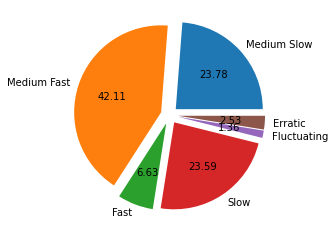

In [12]:
plt.pie(d,autopct='%1.2f',labels=l,explode=e)
plt.show()

In [13]:
#height against speed
x=data1['attack'][0:25]
y=data1['defense'][0:25]

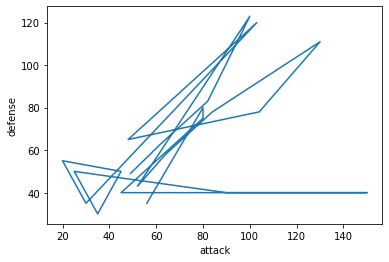

In [14]:
plt.xlabel("attack")
plt.ylabel("defense")
plt.plot(x,y)
plt.show()

In [15]:
#most frequently occuring pokemon type
count= data1['type_1'].value_counts()

In [16]:
X= count.keys()
Y= count

<AxesSubplot:xlabel='type_1', ylabel='pokemon type'>

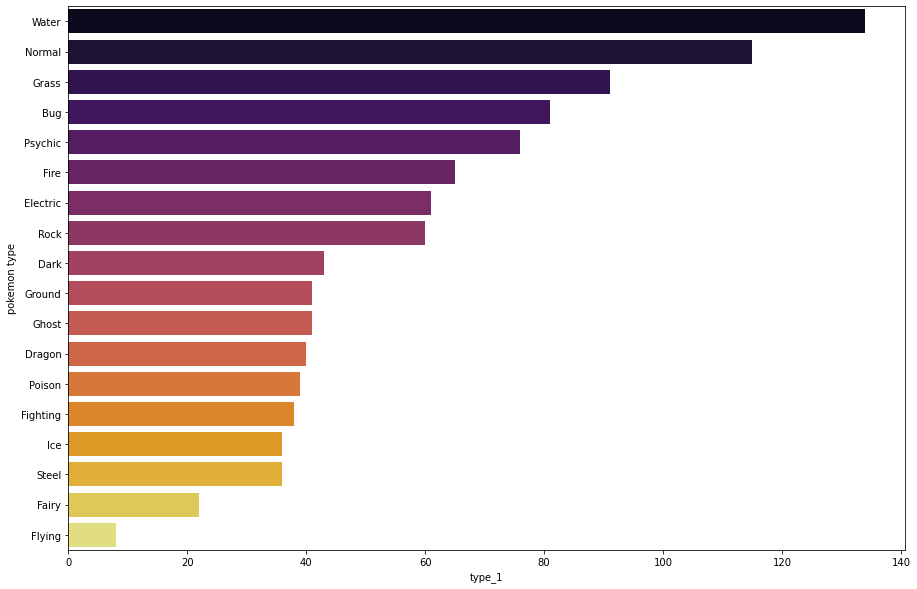

In [17]:
p=plt.figure()
p.set_figwidth(15)
p.set_figheight(10)
plt.xlabel("number of occurences")
plt.ylabel("pokemon type")
sns.barplot(x=Y,y= X,palette= 'inferno')

In [18]:
co=data1.corr()

In [19]:
co

,pokedex_number,generation,is_sub_legendary,is_legendary,is_mythical,type_number,height_m,weight_kg,abilities_number,total_points,...,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles
pokedex_number,1.000000,0.987363,0.115216,0.130128,0.089368,0.050578,0.065046,0.104910,-0.133688,0.123773,...,0.095105,0.093988,0.084873,0.009854,-0.122588,-0.175028,0.120369,-0.007571,-0.031429,0.203792
generation,0.987363,1.000000,0.077620,0.097266,0.052634,0.035281,0.053778,0.068969,-0.109990,0.068167,...,0.053372,0.051826,0.041679,-0.013180,-0.076570,-0.133697,0.073737,0.016862,-0.015721,0.132578
is_sub_legendary,0.115216,0.077620,1.000000,-0.042488,-0.036454,0.041370,0.046019,0.153437,-0.243293,0.253055,...,0.152680,0.211327,0.192656,0.171793,-0.242731,-0.156721,0.299868,-0.127768,0.097313,0.477789
is_legendary,0.130128,0.097266,-0.042488,1.000000,-0.033834,0.076316,0.324818,0.472922,-0.275318,0.395137,...,0.213990,0.302913,0.272196,0.216816,-0.188365,-0.576500,0.345572,-0.118584,NaN,0.615917
is_mythical,0.089368,0.052634,-0.036454,-0.033834,1.000000,0.008984,-0.005738,0.022446,-0.274672,0.219811,...,0.102259,0.214271,0.139751,0.187259,-0.191609,-0.084775,0.259484,-0.075797,NaN,0.434970
type_number,0.050578,0.035281,0.041370,0.076316,0.008984,1.000000,0.082973,0.114884,-0.044736,0.209037,...,0.201371,0.162054,0.153247,0.088623,-0.154452,-0.081205,0.185775,0.042716,-0.034638,0.071406
height_m,0.065046,0.053778,0.046019,0.324818,-0.005738,0.082973,1.000000,0.662038,-0.170187,0.375587,...,0.306338,0.202805,0.309125,0.139297,-0.365657,-0.361041,0.493592,-0.032318,0.046083,0.251700
weight_kg,0.104910,0.068969,0.153437,0.472922,0.022446,0.114884,0.662038,1.000000,-0.230882,0.478458,...,0.465103,0.245747,0.296519,0.060568,-0.315056,-0.420403,0.437312,-0.089882,0.045871,0.448416
abilities_number,-0.133688,-0.109990,-0.243293,-0.275318,-0.274672,-0.044736,-0.170187,-0.230882,1.000000,-0.421520,...,-0.243818,-0.396355,-0.290875,-0.267692,0.358147,0.287900,-0.411831,0.058276,-0.182960,-0.473810
total_points,0.123773,0.068167,0.253055,0.395137,0.219811,0.209037,0.375587,0.478458,-0.421520,1.000000,...,0.631167,0.733708,0.722073,0.562934,-0.730040,-0.325336,0.929738,-0.087395,0.123972,0.536383
